## CONVOLUTIONAL NEURAL NETWORKS

In this assignment, we'll first learn about the individual components of a CNN, and then build one!

### BUILDING A BASIC MODEL
Perhaps the most basic CNN application is handwritten digit recognition. We will develop a model for the same.

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**What is the no. of elements in the training and testing datasets?**

In [3]:
#ENTER YOUR CODE HERE
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


**What are the labels in the dataset?**

In [4]:
#ENTER YOUR CODE HERE
print(X_train)
print(X_train[0].min(),X_train[0].max())
print(y_train)
print(np.unique(y_train))

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
0 255
[5 0 4 ... 5 6 8]
[0 1 2 3 4 5 6 7 8 9]


**Visualise one image for each label.**

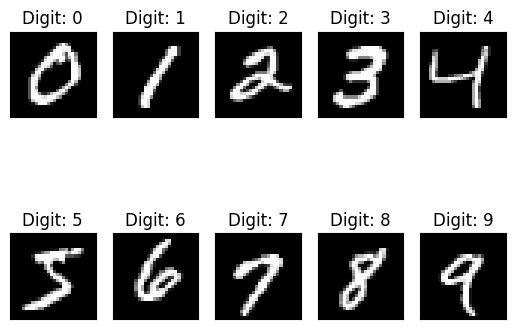

In [6]:
#ENTER YOUR CODE HERE
for i in range(10):
    index = np.where(y_train == i)[0][0]
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[index], cmap='gray')
    plt.title(f'Digit: {i}')
    plt.xticks([])
    plt.yticks([])

plt.show()


**One-hot encode the y labels.**

In [7]:
#ENTER YOUR CODE HERE
import pandas as pd
y_train_en=pd.get_dummies(y_train)
y_test_en=pd.get_dummies(y_test)


**Let's see what every image looks like! Print the pixel array of any one image, and then display the image as well.**

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

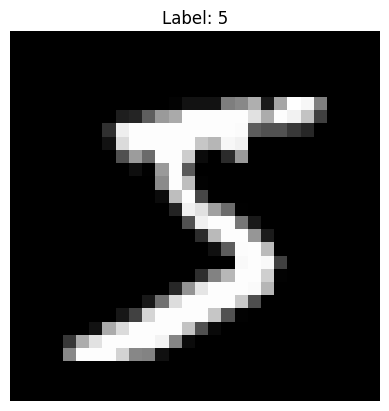

In [8]:
#ENTER YOUR CODE HERE
example_index = 0
print(X_train[example_index])

plt.imshow(X_train[example_index], cmap='gray')
plt.title(f'Label: {y_train[example_index]}')
plt.axis('off')
plt.show()

**Change the dimension of the training and testing datasets for it to become a 3D one.**
Hint: Currently the training dataset is of shape (60000, 28, 28) and you need to reshape it to (60000, 28, 28, 1). Do the same for the testing dataset.

In [9]:
#ENTER YOUR CODE HERE
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

**The last step in the preparation of the dataset is normalisation of the pixel values.**

In [10]:
#ENTER YOUR CODE HERE
X_test=X_test/(255)
X_train=X_train/(255)

**Now we begin training. Compile a model that has 1 convolutional layer with 32 filters, followed by a max pooling layer, followed by another convolutional layer with 64 filters, followed by a max pooling layer and finally dense layers.** - (these are the optimal values of parameters for achieving maximum accuracy)

In [28]:
from tensorflow.keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

# ENTER YOUR CODE HERE

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

**Compile the model with Adam optimizer, and a suitable loss function. Use accuracy as the metric for training.**

In [30]:
#ENTER YOUR CODE HERE
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

**Fit the model and plot the training history.**

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.9947 - loss: 0.0161 - val_accuracy: 0.9874 - val_loss: 0.0382
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 55ms/step - accuracy: 0.9964 - loss: 0.0114 - val_accuracy: 0.9893 - val_loss: 0.0351
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 59ms/step - accuracy: 0.9968 - loss: 0.0093 - val_accuracy: 0.9909 - val_loss: 0.0318
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 56ms/step - accuracy: 0.9972 - loss: 0.0076 - val_accuracy: 0.9882 - val_loss: 0.0417
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 54ms/step - accuracy: 0.9978 - loss: 0.0066 - val_accuracy: 0.9889 - val_loss: 0.0422


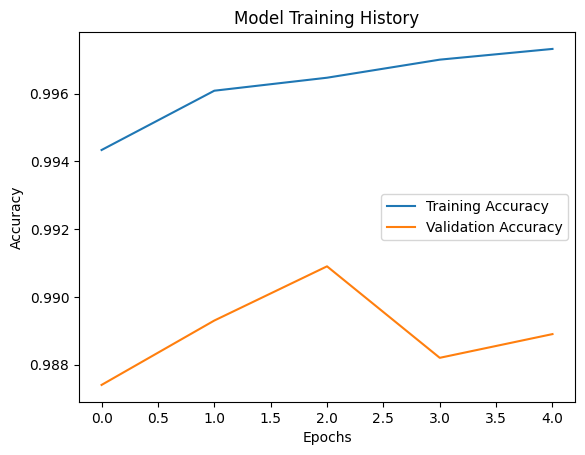

In [35]:
#ENTER YOUR CODE HERE
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train_en, epochs=5, batch_size=64,validation_data=(X_test, y_test_en))

# Plot the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Training History')
plt.show()

**Now test your model on the training dataset and print the classification matrix.**

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test).argmax(axis=1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Lets visualise the prediction, along with the input now.**

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


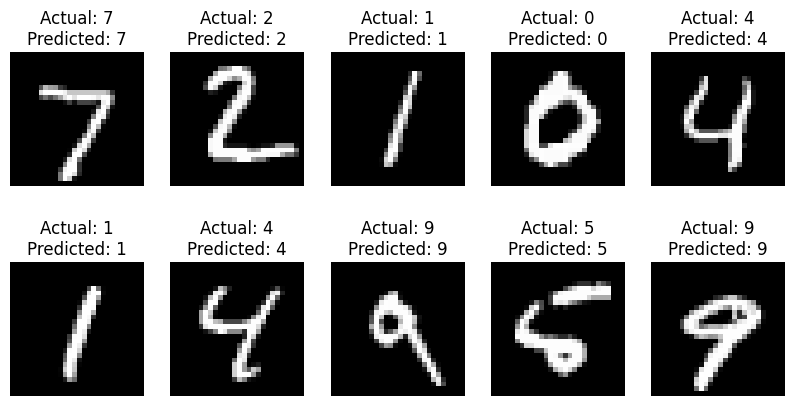

In [33]:
rows = 2
columns = 5

y_pred = model.predict(X_test).argmax(axis=1)

figure = plt.figure(figsize=(10, 5))

for i in range(10):

    figure.add_subplot(rows, columns, i+1)

    plt.imshow(X_test[i], cmap='grey')
    plt.title(f"Actual: {y_test[i]}\nPredicted: {y_pred[i]}")
    plt.axis('off')

**But what did the convolution layers do? Lets visualise the outputs of filters for the first test image.**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


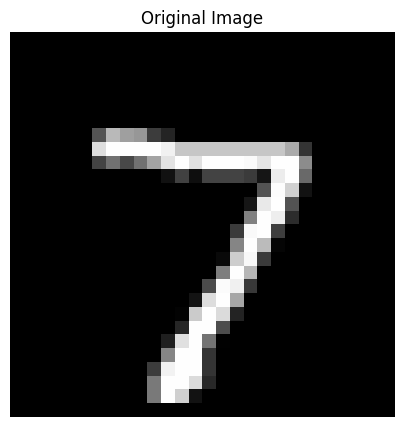

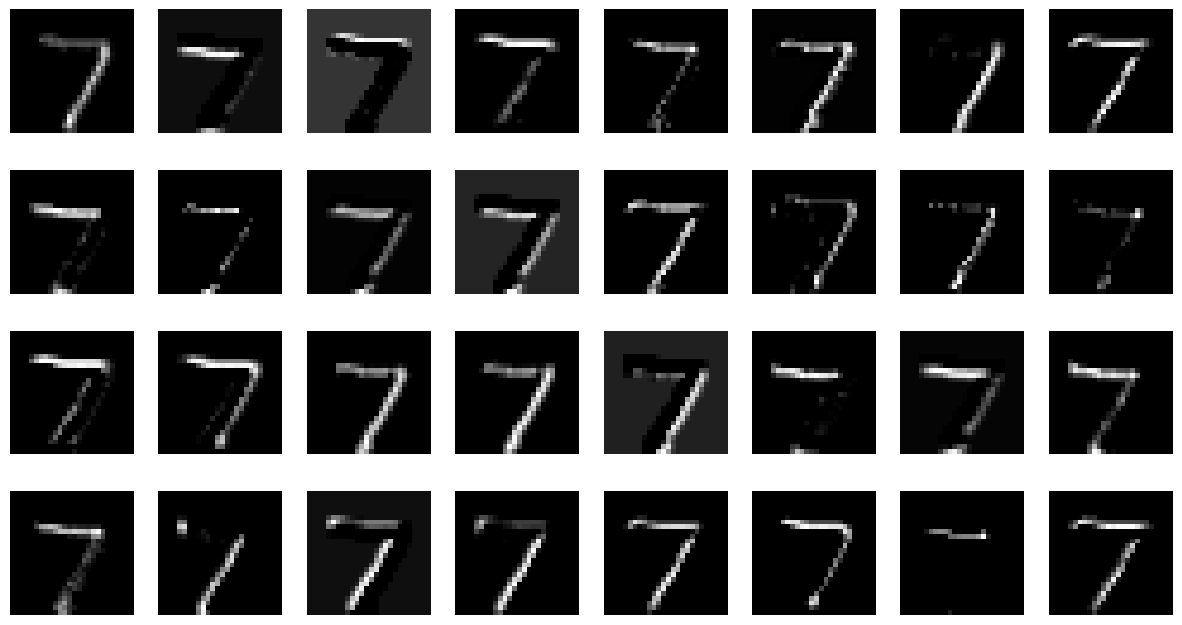

In [42]:
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name or 'pool' in layer.name]
activation_model = tf.keras.models.Model(inputs=model.inputs, outputs=layer_outputs)
test_image = X_test[0].reshape(1, 28, 28, 1)

feature_maps = activation_model.predict(test_image)

plt.figure(figsize=(5, 5))
plt.imshow(test_image[0, :, :, 0], cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

n_filters = feature_maps[0].shape[-1]
fig, axes = plt.subplots(4, 8, figsize=(15, 8))

for i in range(n_filters):
    ax = axes[i // 8, i % 8]
    ax.imshow(feature_maps[0][0, :, :, i], cmap='grey')
    ax.axis('off')

plt.show()


**Output of the max pooling layer.**

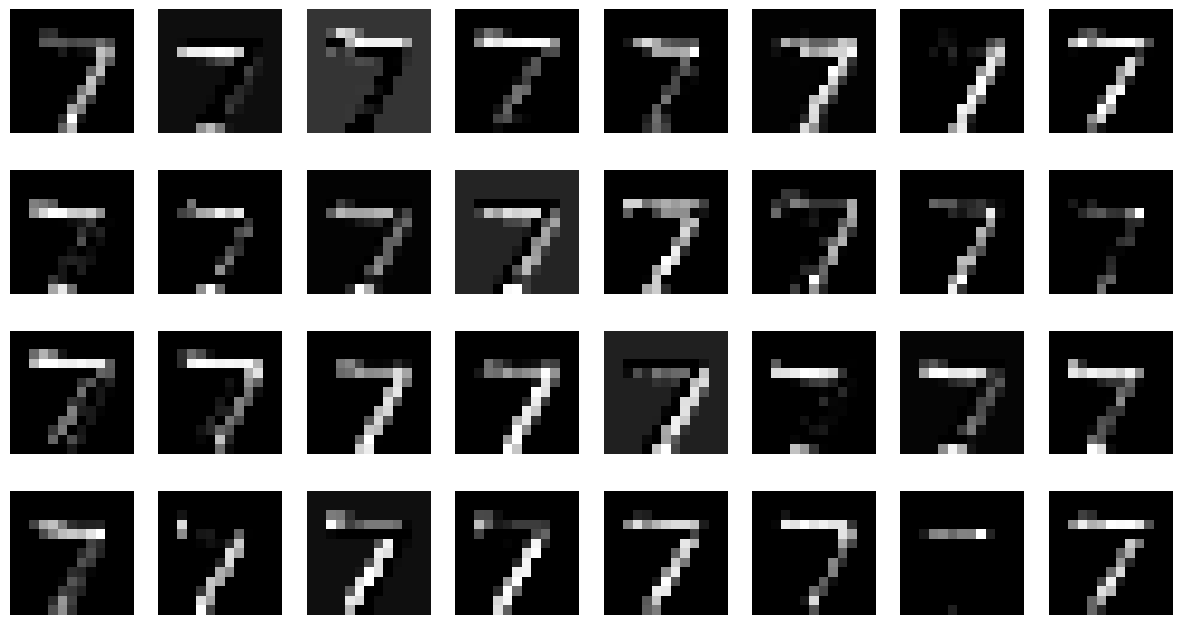

In [43]:
n_filters = feature_maps[1].shape[-1]
fig, axes = plt.subplots(4, 8, figsize=(15, 8))

for i in range(n_filters):
    ax = axes[i // 8, i % 8]
    ax.imshow(feature_maps[1][0, :, :, i], cmap='grey')
    ax.axis('off')

plt.show()